In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize GBM model (XGBoost)
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



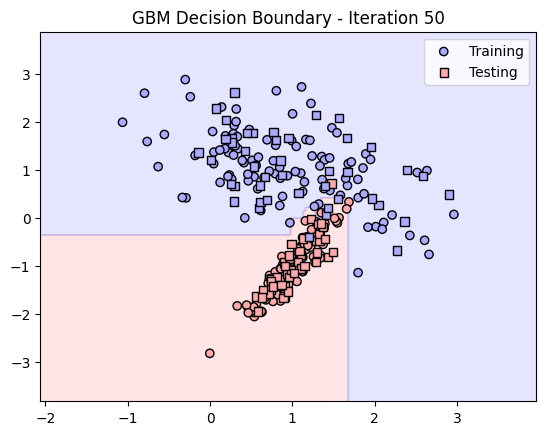

In [5]:
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

# Create a smaller dataset for visualization
from sklearn.datasets import make_classification
X_vis, y_vis = make_classification(
    n_samples=300, n_features=2, n_informative=2, 
    n_redundant=0, n_repeated=0, n_clusters_per_class=1, random_state=42
)

# Train-test split
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Initialize the GBM model
gbm_vis = xgb.XGBClassifier(n_estimators=50, learning_rate=0.2, max_depth=3, random_state=42)

# Train step by step
fig, ax = plt.subplots()
cmap = ListedColormap(["#FFAAAA", "#AAAAFF"])

def update(frame):
    ax.clear()
    gbm_vis.n_estimators = frame + 1
    gbm_vis.fit(X_vis_train, y_vis_train)

    # Plot decision boundary
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = gbm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Plot training points
    ax.scatter(X_vis_train[:, 0], X_vis_train[:, 1], c=y_vis_train, cmap=cmap, edgecolors="k", label="Training")
    ax.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_vis_test, cmap=cmap, marker="s", edgecolors="k", label="Testing")

    ax.set_title(f"GBM Decision Boundary - Iteration {frame + 1}")
    ax.legend()

ani = animation.FuncAnimation(fig, update, frames=50, repeat=False)
ani.save("gbm_animation.gif", writer="pillow", fps=5)
plt.show()
